---
title: "PM Peak travel distance skim for SOV NT"
format: 
  html: 
    toc: true
    css: styles.css
jupyter: python3
execute:
  echo: false
---

In [1]:
from util import Skim
from config import scenarioPath_OpenPath
from config import scenarioPath_EMME437
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# generate comparison
scenarioOne = Skim.skimReader(scenarioPath_OpenPath, time_periods='PM',skim='traffic')
scenarioTwo = Skim.skimReader(scenarioPath_EMME437, time_periods='PM',skim='traffic')

In [3]:
# OpenPaths minus EMME4.3.7 (exclude Origin and Destination columns)
comparison = scenarioOne.set_index(['Origin', 'Destination']) - scenarioTwo.set_index(['Origin','Destination'])
comparison.reset_index(inplace=True)

Comparison table of select matrix from AM Peak traffic skim (top 5)

In [4]:
comparison.sort_values(by='SOV_NT_M_DIST__PM', ascending=False).head().style.set_table_styles(
    [{'selector': 'thead th', 'props': [('background-color', 'blue')]}]  # Custom header style
).hide(axis = "index")

Origin,Destination,SOV_NT_M_DIST__PM
1196,4872,11.502254
1311,4872,11.053543
1368,4872,11.053543
1354,4872,11.053543
1410,4872,11.053543


In [5]:
comparison.SOV_NT_M_DIST__PM.describe()

count    2.447281e+07
mean     5.467444e-03
std      2.765377e-01
min     -1.152567e+01
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.150225e+01
Name: SOV_NT_M_DIST__PM, dtype: float64

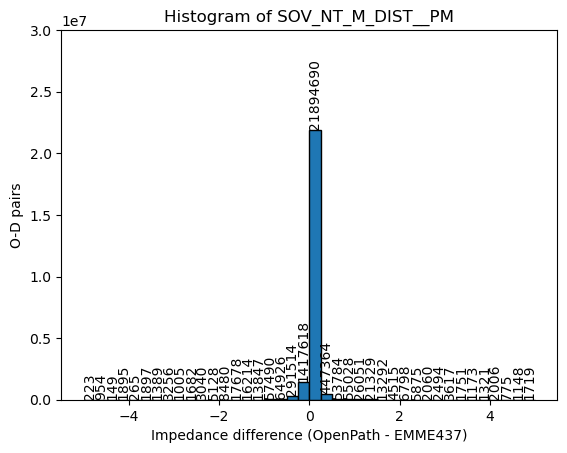

In [12]:
# Create histogram with specified bins
counts, bins, patches = plt.hist(comparison['SOV_NT_M_DIST__PM'], bins=np.arange(-5, 5.25, 0.25), edgecolor='black')

# Set title and labels
plt.title('Histogram of SOV_NT_M_DIST__PM')
plt.xlabel('Impedance difference (OpenPath - EMME437)')
plt.ylabel('O-D pairs')

# Change the y-axis range
plt.ylim(0, 30000000) 

# Add values on top of each bin
for count, bin in zip(counts, bins):
    # Calculate the position for the text (center of each bin)
    plt.text(bin + 0.125, count, str(int(count)), ha='center', va='bottom', rotation=90)

# Show the plot
plt.show()